<div align='center'><font size="6" color="#FFA500">Visualizing Kannada MNIST with t-SNE</font></div>

<div align='center'><font size="4" color="#FFA500">A 3 part series on Dimensionality reduction techniques using the Kannada MNIST dataset</font></div>
<hr>


## Drawbacks of PCA

In my last kernel titled [Visualizing Kannada MNIST with PCA](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-pca), I demonstrated how we could visualize the Kannada MNIST dataset by reducing the 784 dimensions into 2 thereby, making it easy to be viewed by human eye. We used PCA for reducing the dimensionality of the dataset. PCA essentially tries project the original data onto the directions where variance is maximum. In our case it projcected the data onto 2 Dimensions which could then be easily visualised.

However, the visualisations produced by PCA was not able to do such a good job in differentiating all the digits.This is because PCA is a **linear projection**, which means it can’t capture non-linear dependencies. In this notebook we shall explore another Dimensionality reduction technique called **t-SNE** and see if it gives us better results as compared to PCA
<hr>
<div align='left'><font size="4" color="#FFA500">Part2: t-SNE(T-distributed stochastic neighbour embedding) in Python</font></div>
<hr>

## Table of Contents

* What is t-SNE
* Embeddings]
* t-SNE under the hood
* t-SNE with Scikit learn
* Interactively visualising t-SNE with Bokeh
* Further Readings



## <a name="tsne"></a>t-SNE

**t-SNE** or **T-distributed stochastic neighbour embedding** takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. It does so by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data. 
t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. 

## <a name="embeddings"></a>Embeddings
An **embedding** is essentially a low-dimensional space into which a high dimensional vector can be translated. During translation, an embedding preserves the semantic relationship of the inputs by placing similar inputs close together in the embedding space. Let’s try and wrap our head around this concept with examples. Here is a grab from the creators of the [Embedding projector](https://projector.tensorflow.org/), a tool which enables us to visualise high dimensional data easily.

<iframe src="https://player.vimeo.com/video/340677521" width="640" height="352" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>
<p><a href="https://vimeo.com/340677521.mp4">Embeddings</a> from <a href="https://vimeo.com/user97669696">Parul Pandey</a> on <a href="https://vimeo.com">Vimeo</a>.</p>

## t-SNE under the hood
**t-SNE**, was proposed by Geoffry Hinton’s and Laurens van der Maaten  back in 2008. Their paper titled [Visualizing Data using t-SNE](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) is an essential read for soembody trying to understand t-SNE. Here is how t-SNE basically works:

1.  First, a probability distribution is created in a high dimensional space. This means if we pick a point in the dataset, we define the probability of picking another point as a neighbour.
2. Next, a low dimensional space is then created that has the same(or as near as possible) probability distribution as the high Dimensional space.

## t-SNE with Scikit learn

Scikit-learn has an implementation of t-SNE available, and you can check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). 





In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### Loading the necessary libraries

In [3]:
from platform import python_version
print(python_version())

3.10.9


In [2]:
from time import time

import numpy as np
import pandas as pd


# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Reading in the data

In [4]:
#load mnist and assing to train and test set
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2023-10-16 11:35:14.068437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


numpy.ndarray

0        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
59995    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59996    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59997    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59998    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59999    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 0, Length: 60000, dtype: object

In [16]:
import glob
my_csvs = glob.glob('*.csv')
my_csvs

['mnist_train.csv', 'mnist_test.csv']

In [17]:
train=  pd.read_csv('mnist_train.csv')
test=  pd.read_csv('mnist_test.csv')

train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Setting the label and the feature columns

In [20]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

KeyError: 'pixel0'

In [21]:
## Plotting the original train data

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

NameError: name 'x' is not defined

In [7]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


In [8]:
# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


### Applyting t-SNE on the data

In [9]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 12.2 µs


Here is a brief explanation of the parameter.

* **n_components (default: 2)**: Dimension of the embedded space.
* **verbose (default: 0)** : Verbosity level.
* **perplexity (default: 30)**: The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
* **n_iter (default: 1000)**: Maximum number of iterations for the optimization. Should be at least 250.

There are other parameters which can be tunes. refer to the [documentation](http://)https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for detailed info.


### Visualizing the t-SNE

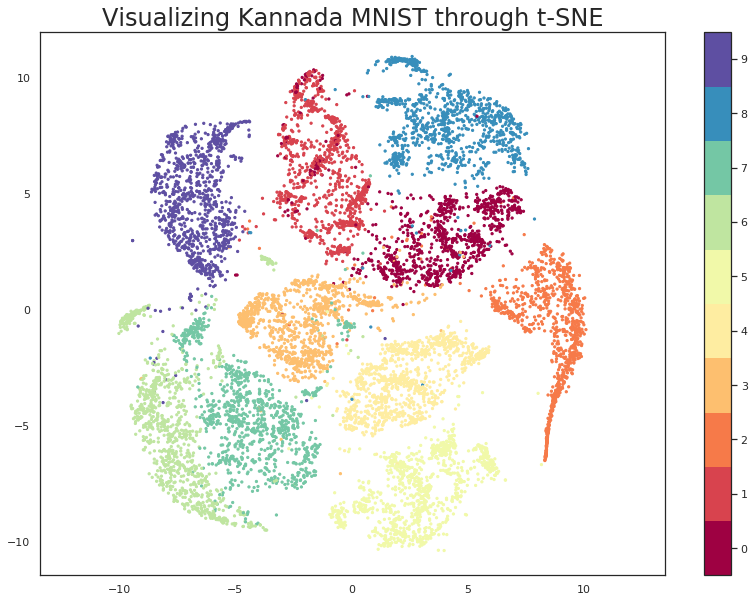

In [10]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);


An important point to note here is that t-SNE is computationally expensive, hence it is mentioned in its documentation that :

*It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.*

### Using PCA to reduce dimensions of data before feeding to t-SNE  algorithm

In [12]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [13]:
# Using the output of PCA as input for t-SNE
%time
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


Wow!! the time taken for the algorithm to run has been considerably reduced.

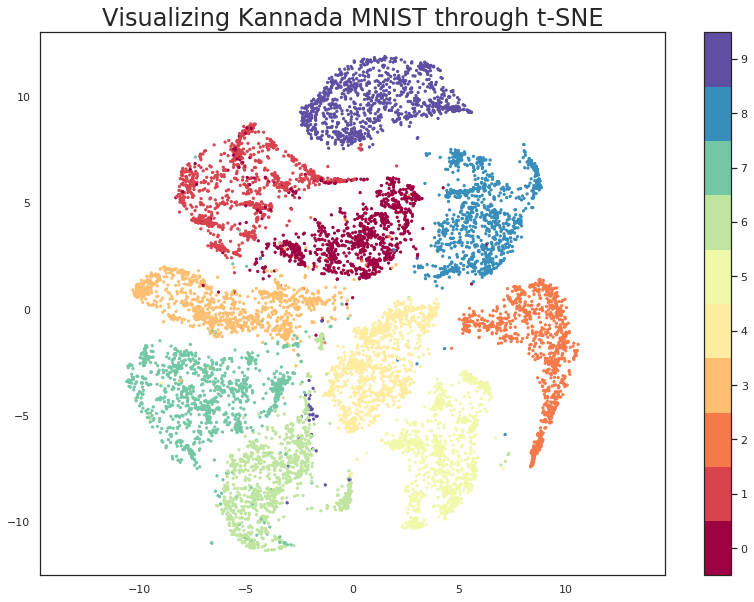

In [14]:
#visualising t-SNE again 

plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

### Visualising TSNE in 3D

Let's try and visualise the output as a 3D scatter plot:
## With Matplotlib

In [15]:
%time
pca_tsne2 = TSNE(random_state = 42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


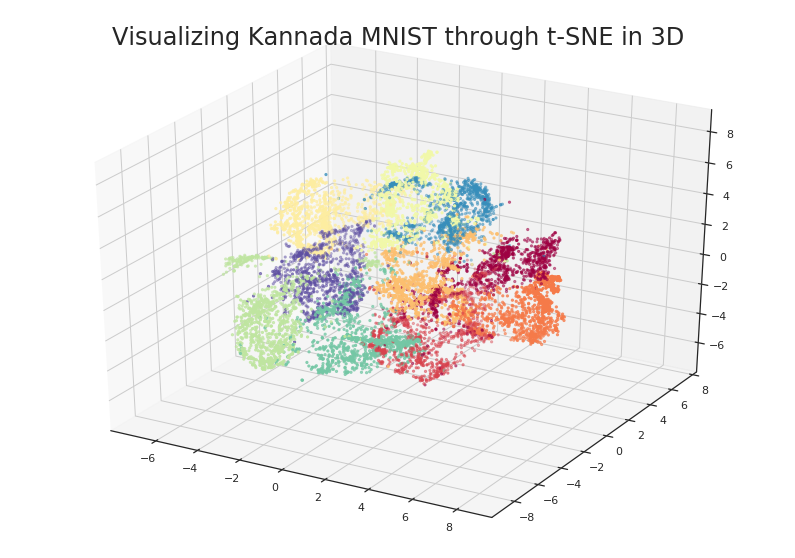

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=y_subset, cmap='Spectral')
plt.title('Visualizing Kannada MNIST through t-SNE in 3D', fontsize=24);
plt.show()

## With Plotly

In [ ]:
x=pca_tsne2[:, 0]
y=pca_tsne2[:, 1]
z=pca_tsne2[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=x,                # set color to an array/list of desired values
        colorscale='Spectral',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
x=pca_tsne2[:, 0]
y=pca_tsne2[:, 1]
z=pca_tsne2[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=3, symbol="circle"),
    )
])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Using Bokeh to visualize t-SNE
We see that t-SNE has successfully captured the classes. To get a better idea of why t-SNE chose to do this it is helpful to see the actual digits involve. One can do this using bokeh and mouseover tooltips of the images.

Source of code : https://umap-learn.readthedocs.io/en/latest/basic_usage.html



In [ ]:
# Encoding all the images for inclusion in a dataframe.

from io import BytesIO
from PIL import Image
import base64


def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((28,28), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [ ]:
# loading up bokeh and other tools to generate a suitable interactive plot.

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

In [ ]:
# Generating the plot itself with a custom hover tooltip 

x_subset_reshape = x_subset.reshape(-1,28,28)

digits_df = pd.DataFrame(pca_tsne, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in y_subset]
digits_df['image'] = list(map(embeddable_image, x_subset_reshape))


datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in y_subset],
                                       palette=Spectral10)

plot_figure = figure(
    title='t-SNE projection of the Kannada MNIST dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

**Hover over the plot to actually see the digits in the clusters**

Let's see a comparison of the PCA and the t-SNE technique on the same dataset

![](https://imgur.com/iO8ahC6.png);![](https://imgur.com/Suki6Px.png)

Thus, we can see t-SNE does a better job as compared to PCA when it comes to visualising High Dimensional datasets.Similar digits are clustered together. If we were to use a clutering algorithm on this output, we can easily assign labels to unseen test data.




### Other notebooks in this series:

* [Part 1: Visualizing Kannada MNIST with PCA](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-pca)
* [Part 2: Visualizing Kannada MNIST with t-SNE](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-t-sne)
* [Part 3: Visualizing Kannada MNIST with UMAP](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-umap-technique)
<hr>


## Further Readings
[The original paper by Hinton and  Maaten](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

[A blog post by distilled on using t-SNE effectively (and understanding its pitfalls)](https://distill.pub/2016/misread-tsne/)

[The scikit-learn docs](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)